## Import all relevant libraries
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/edit/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week1/Optional%20Labs/C1_W1_Lab03_Model_Representation_Soln.ipynb

In [2]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem statement
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

- We first start by pre-downloaded dataset into the same directory where this python file is running.

- We next convert the pandas file into 2 numpy array: x (training data) and y (label)

- We can also determine the number of training data using `x.shape[0]`. In this program, we will refer number of training data as `m`

In [5]:
df = pd.read_csv("Hours and Scores.csv")  # Adjust the file name if needed

x = df[["Hours"]].values.flatten()  # Converts 'Hours' column to a NumPy array (1D)
y = df["Scores"].values   # Converts 'Scores' column to a NumPy array (1D)
m = x.shape[0]

print(x.shape)  # Output: (n) -> 1D array
print(y.shape)  # Output: (n,)  -> 1D array


(25,)
(25,)


# About Dataset

Training example `x_i, y_i`
You will use (x$^{(i)}$, y$^{(i)}$) to denote the training example. Since Python is zero indexed, in the first training example (x$^{(0)}$, y$^{(0)}$) is (2.5, 21) and in the second training example (x$^{(1)}$, y$^{(1)}$) is (5.1, 47).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`. Run the next code block below to get the nth training example.

In [8]:
i = 0

x_i = x[i]
y_i = y[i]
print(f"(x^({i}), y^({i}) = ({x_i}, {y_i})")

i = 1

x_i = x[i]
y_i = y[i]
print(f"(x^({i}), y^({i}) = ({x_i}, {y_i})")

(x^(0), y^(0) = (2.5, 21)
(x^(1), y^(1) = (5.1, 47)


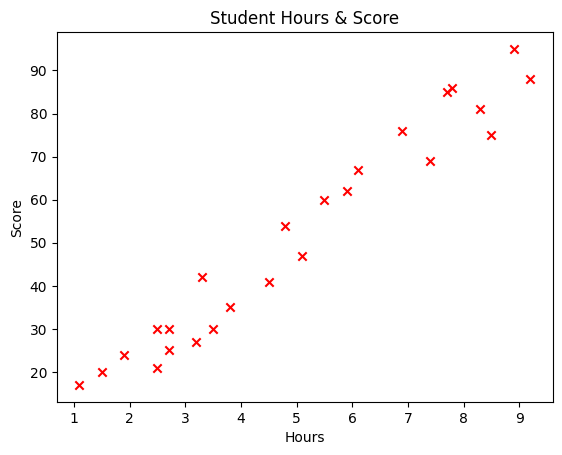

In [28]:
plt.scatter(x, y, marker='x', c='r')
plt.title("Student Hours & Score")
plt.ylabel('Score')
plt.xlabel('Hours')
plt.show()

In [34]:
def compute_cost(x, y, weight, bias):
    
    m = x.shape[0]

    sum_cost = 0
    for i in range(m):
        prediction = weight * x[i] + bias
        cost = (prediction - y[i]) ** 2
        sum_cost += cost

    total_cost = (1 / (2 * weight)) * sum_cost
    
    return total_cost

In [38]:
def compute_gradient(x, y, weight, bias):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        prediction = weight * x[i] + bias
        dj_dw_i = (prediction - y[i]) * x[i]
        dj_db_i = prediction - y[i]
    dj_db += dj_dw_i / m
    dj_dw += dj_db_i / m

    return dj_dw, dj_db

In [46]:
def gradient_descent(x, y, weight, bias, alpha, num_iters, compute_cost, computer_gradient):
    
    w = copy.deepcopy(weight)
    J_history = []
    p_history = []
    b = bias
    w = weight

    for i in range(num_iters):
        dj_dw, dj_db = computer_gradient(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:
            J_history.append( compute_cost(x, y, w , b))
            p_history.append([w,b])
        
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [84]:
w_init = 0
b_init = 0

iterations = 50000
tmp_alpha = 1.0e-5
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.19e+09  dj_dw: -3.440e+00, dj_db: -2.683e+01   w:  3.440e-05, b: 2.68320e-04
Iteration 5000: Cost 2.23e+05  dj_dw: -3.334e+00, dj_db: -2.601e+01   w:  1.694e-01, b: 1.32115e+00
Iteration 10000: Cost 1.05e+05  dj_dw: -3.232e+00, dj_db: -2.521e+01   w:  3.335e-01, b: 2.60146e+00
Iteration 15000: Cost 6.59e+04  dj_dw: -3.133e+00, dj_db: -2.443e+01   w:  4.926e-01, b: 3.84244e+00
Iteration 20000: Cost 4.65e+04  dj_dw: -3.036e+00, dj_db: -2.368e+01   w:  6.468e-01, b: 5.04529e+00
Iteration 25000: Cost 3.49e+04  dj_dw: -2.943e+00, dj_db: -2.296e+01   w:  7.963e-01, b: 6.21120e+00
Iteration 30000: Cost 2.74e+04  dj_dw: -2.853e+00, dj_db: -2.225e+01   w:  9.412e-01, b: 7.34130e+00
Iteration 35000: Cost 2.20e+04  dj_dw: -2.765e+00, dj_db: -2.157e+01   w:  1.082e+00, b: 8.43667e+00
Iteration 40000: Cost 1.81e+04  dj_dw: -2.680e+00, dj_db: -2.091e+01   w:  1.218e+00, b: 9.49840e+00
Iteration 45000: Cost 1.51e+04  dj_dw: -2.598e+00, dj_db: -2.026e+01   w:  1.350e+00, b: 1.05

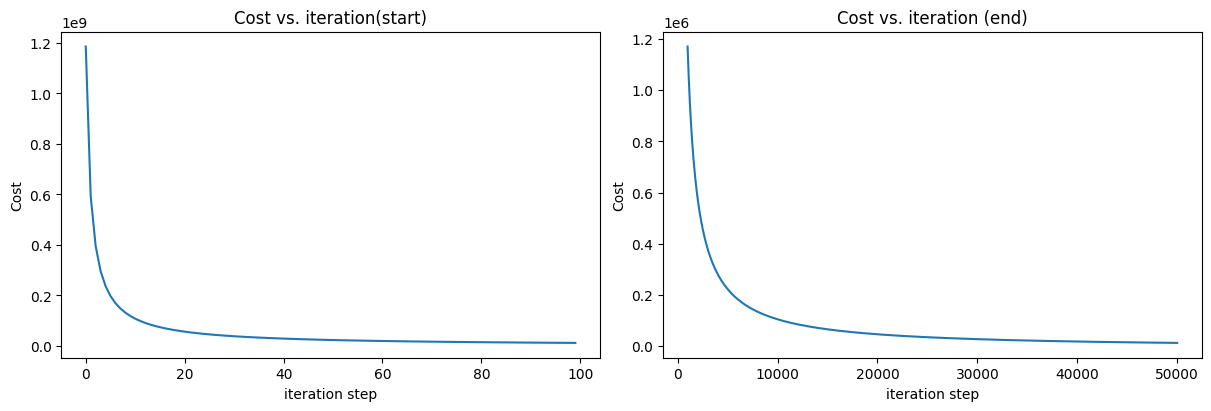

In [85]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [86]:
def predict(x, weight, bias):
    return weight * x + bias
predict(2.5, w_final, b_final)

np.float64(15.218679068314021)